In [22]:
from ggplot import *
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
print (__version__) # requires version >= 1.9.0

#Always run this the command before at the start of notebook
init_notebook_mode(connected=True)
import plotly.graph_objs as go

2.3.0


In [74]:
data = pd.read_csv("data.csv")

In [114]:
pd.options.display.float_format =  '{:.0f}'.format
data[:600].describe()

,title_words,days_passed,ct_image,ct_tags,ct_words,title_emot_quotient,read_time,claps,img/word
count,600,600,600,600,600,600,600,600,600
mean,7,57,7,5,1260,0,7,752,0
std,2,66,6,1,722,0,3,1651,0
min,2,1,0,0,16,0,2,2,0
25%,5,20,3,5,742,0,4,106,0
50%,6,40,5,5,1088,0,6,280,0
75%,8,68,9,5,1617,0,8,748,0
max,16,624,35,5,4441,1,22,22000,0


In [76]:
p1 = [
    go.Box(
        y=data['claps'],
        boxpoints='all',
        jitter=0.3,
        pointpos=-1.8,
        boxmean=True,
    )
]
iplot(p1)

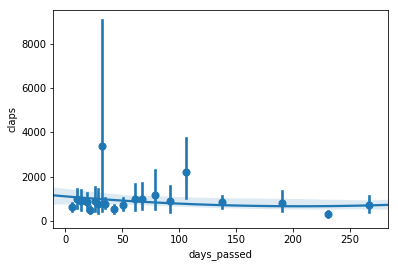

In [81]:
ax = sns.regplot(x="days_passed", y="claps", data=data, order =2, x_bins=20)

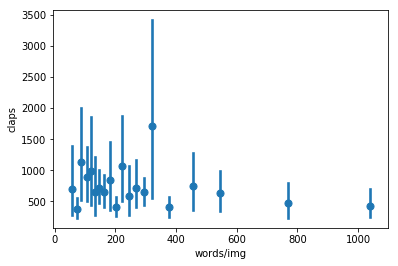

In [67]:
ax = sns.regplot(x="words/img", y="claps", data=data.dropna(), order =1, x_bins=20)

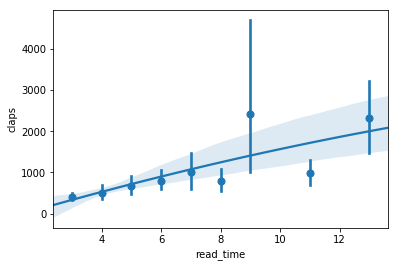

In [77]:
ax = sns.regplot(x="read_time", y="claps", data=data, order =2, x_bins=20)

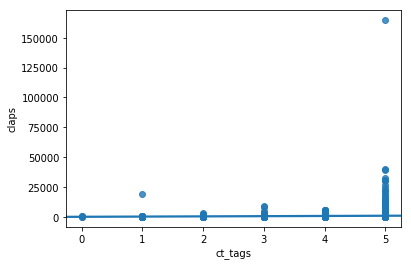

In [78]:
ax = sns.regplot(x="ct_tags", y="claps", data=data)

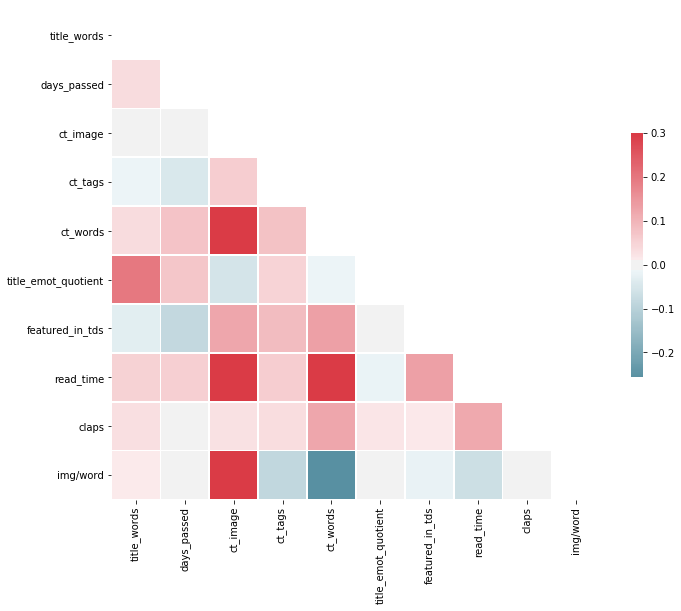

In [79]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
text = data['text'][:1000].str.cat(sep=' ')

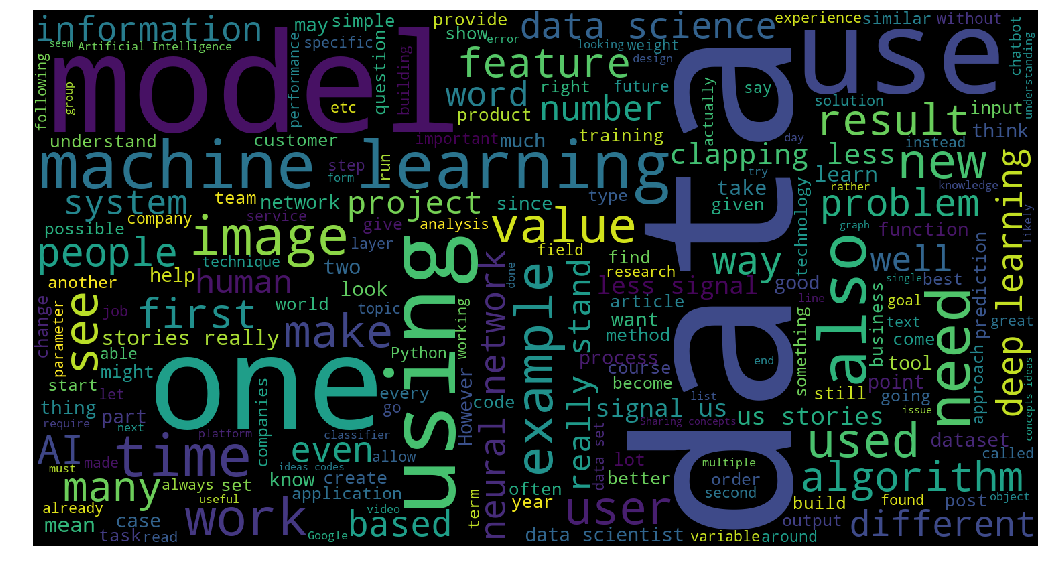

In [100]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
stop = STOPWORDS.union(set(stopwords.words('english')))
wordcloud = WordCloud(relative_scaling = 1.0,stopwords = stop,width=1500, height=800).generate(text)
plt.figure(figsize=(18, 16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [116]:
data[:600].groupby('title_words')['claps'].mean()

title_words
2     382
3     427
4     492
5     519
6     950
7     740
8     830
9     757
10   1160
11   1413
12    444
13   2067
14    212
16    279
Name: claps, dtype: float64

In [123]:
mean_title_words = data.loc[:600,['claps','title_words']].sort_values('claps')[:-5].groupby('title_words')['claps'].mean()

Text(0,0.5,'average number of claps')

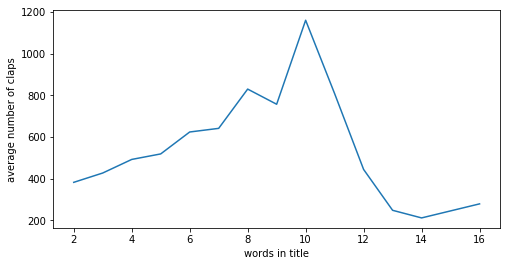

In [130]:
plt.figure(figsize=(8, 4))
plt.plot(mean_title_words,)
plt.xlabel("words in title")
plt.ylabel("average number of claps")